[View in Colaboratory](https://colab.research.google.com/github/ibarrond/Amadeus/blob/master/AmadeusChallenge.ipynb)

This notebook serves as solution to a challenge for a Data Scientist position in Amadeus. [Data files](https://amadeus.app.box.com/s/285ek69o3e79h2plbkicwj3uiqxbl68n) are not provided, since these files are quite large.

View this notebook in http://nbviewer.jupyter.org/github/ibarrond/Amadeus/blob/master/AmadeusChallenge.ipynb

Original code can be found in https://github.com/ibarrond/Amadeus

## 1. Set Up the Environment and Load the Data
This environment, as part of a Linux Virtual Machine, offers Python3 with GPU acceleration and 12 GB of RAM. The RAM size makes it possible to handle the size of the two files provided for this challenge in memory:
- `booking.csv` - 4GB
- `searches.csv` - 3.4GB

### 1.1 Obtaining the Data
In order to import the data we upload the files to a Google Drive folder , then mount our Drive folder in the VM (based on [this tutorial](https://colab.research.google.com/notebooks/io.ipynb)) and finally access the files:

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


We check that the files are there:

In [19]:
!ls -la 'gdrive/My Drive/Colab Notebooks/Amadeus'

total 7754993
-rw------- 1 root root       8350 Oct  8 12:59 AmadeusChallenge.ipynb
-rw------- 1 root root 4244874509 Oct  8 11:57 bookings.csv
-rw------- 1 root root 3696229366 Oct  8 12:36 searches.csv


In [0]:
# We store the path to each of the data files
bookings_file = 'gdrive/My Drive/Colab Notebooks/Amadeus/bookings.csv'
searches_file = 'gdrive/My Drive/Colab Notebooks/Amadeus/searches.csv'

#### # FIRST EXERCISE: count the number of lines in Python for each file_
After a quick searck online, this [source](https://stackoverflow.com/questions/16108526/count-how-many-lines-are-in-a-csv-python) suggested the use of `open()` function to read the number of files:

In [0]:
with open(bookings_file) as f: bookings_num_lines = sum(1 for line in f)
with open(searches_file) as f: searches_num_lines = sum(1 for line in f)

In [7]:
bookings_num_lines

10000011

In [8]:
searches_num_lines

20390199

__*RESULT*__: we counted **10,000,011** lines in the `bookings.csv` file, and **20,390,199** lines in the `searches.csv` file. Later on we discover that the first line contains the column names.

### 1.2 Importing the Bookings Data
Now that the files are there, we import them to our IPython session using **Pandas**. Indeed, we will use Pandas for most of our data management.

In [0]:
import pandas as pd
import numpy as np

Before importing the whole csv file, we'll first have a look at the data structure by examining the first few lines of the file:

In [7]:
bookings = pd.read_csv(bookings_file, nrows=5)
bookings.head()

,act_date ^source^pos_ctry^pos_iata^pos_oid ^rloc ^cre_date ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route ^carrier^bkg_class^cab_class^brd_time ^off_time ^pax^year^month^oid
0,2013-03-05 00:00:00^1A ^DE ^a68dd7ae95...
1,2013-03-26 00:00:00^1A ^US ^e612b9eeee...
2,2013-03-26 00:00:00^1A ^US ^e612b9eeee...
3,2013-03-26 00:00:00^1A ^AU ^0f984b3bb6...
4,2013-03-26 00:00:00^1A ^AU ^0f984b3bb6...


Clearly the symbol '^' is being used as separator. With this in mind, we load the data correctly:

In [62]:
bookings = pd.read_csv(bookings_file, sep='^', nrows=5)
bookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


We finally load all the `bookings.csv` data correctly. For the second exercise we will only need the columns `pax`, and `arr_port`, thus we only import these:

In [0]:
bookings = pd.read_csv(bookings_file, usecols=['arr_port', 'pax'], sep='^')

In [36]:
bookings.head()

,arr_port,pax
0,LHR,-1.0
1,CLT,1.0
2,CLT,1.0
3,SVO,1.0
4,SVO,1.0


## 2. SECOND EXERCISE: Top 10 arrival airports in the world in 2013

IN order to accumulate the number of petitions, we should first check for empty data:

In [51]:
bookings.isnull().sum()

arr_port    0
pax         1
dtype: int64

Looks like there is one empty value in the pax column. We will find it and remove it from our dataframe:

In [55]:
bookings[bookings.isnull().any(axis=1)]

,arr_port,pax
5000007,SG,NaN


In [0]:
bookings = bookings.drop(index=5000007)

Now we can launch our query to the dataframe. It is composed of:
1. Aggregation by `arr_port`: We will aggregate the destination airport using `groupby(['arr_port'])`.
2. Accumulating the number of passengers: sum the pax, simply using `sum()`,
3. Obtaining the top 10 by sorting via `.sort_values(by=['pax'], ascending=False)` and extracting the top 10 with `head(10)`.

In [0]:
top10_arr_port = bookings.groupby(['arr_port']).sum().sort_values(by=['pax'], ascending=False).head(10)

__*RESULT*__: The top 10 airports, including the number of passengers (pax column) are: 

In [74]:
top10_arr_port

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


__*BONUS*__: we can also obtain the name of the airports. We will use GeoBases for that:

In [0]:
!pip install GeoBases3K

In [137]:
from GeoBases import GeoBase
geo_a = GeoBase(data='airports')

Import successful from /usr/local/lib/python3.6/dist-packages/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv
Available fields for things: ['__key__', '__dup__', '__par__', '__lno__', 'iata_code', 'name', 'city_code', 'country_code', 'country_name', 'lat', 'lng', '__gar__']
(Join) loaded external base "countries" [with ('code',)] for join on ('country_code',)
Built index for fields ('code',)
(Join) loaded external base "ori_por" [with ('iata_code',)] for join on ('city_code',)
/!\ Index on ('iata_code',) already built, exiting...


Now we can search on the airport data using `geo_a.get(x, field='name')`. However, we noticed before that the IATA codes have trailing spaces. We will correct that before anything else. Then we apply the GeoBases get function to the indexes of our dataframe. We can also obtain the city code:

In [138]:
top10_arr_port.index        = top10_arr_port.index.str.strip()
top10_arr_port['port_name'] = top10_arr_port.index.map(lambda x: geo_a.get(x, field='name'))
top10_arr_port['city']      = top10_arr_port.index.map(lambda x: geo_a.get(x, field='city_code'))
top10_arr_port

,pax,port_name,city
arr_port,,,
LHR,88809.0,London Heathrow Airport,LON
MCO,70930.0,Orlando International Airport,ORL
LAX,70530.0,Los Angeles International Airport,LAX
LAS,69630.0,McCarran International Airport,LAS
JFK,66270.0,John F Kennedy International Airport,NYC
CDG,64490.0,Paris - Charles-de-Gaulle,PAR
BKK,59460.0,Suvarnabhumi,BKK
MIA,58150.0,Miami International Airport,MIA
SFO,58000.0,San Francisco International Airport,SFO


## 3. THIRD EXERCISE: plot monthly number of searches for flights arriving at Malaga, Madrid or Barcelona

For the arriving airport, we can use the Destination column in the searches file. 

We have to Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure. 

###  3.1 Importing and cleaning the Searches Data

Just as with the Bookings data, we need to perform some initial exploratory analysis to correctly import the data.

In [140]:
searches = pd.read_csv(searches_file, nrows=5)
searches.head()

,Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
0,2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c1...
1,2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5c...
2,2013-01-01^18:04:49^MPT^3561a60621de06ab1badc8...
3,2013-01-01^17:42:40^FXP^1864e5e8013d9414150e91...
4,2013-01-01^17:48:29^MPT^1ec336348f44207d2e0027...


Yet again, the delimiter seems to be '^'. 

In [142]:
searches = pd.read_csv(searches_file, delimiter='^', nrows=5)
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


For now we're only interested in the Destination airport and the date. Let's get all the data:

In [152]:
searches = pd.read_csv(searches_file, delimiter='^', usecols=['Date', 'Destination'])
searches.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


Before going any further, we check for empty values that might cause some errors.

In [156]:
searches.isnull().sum()

Date            0
Destination    33
dtype: int64

Since we have several empty values, we remove them from our dataset:

In [0]:
searches = searches.dropna()

We have  awuick look at the resulting dataset:

In [160]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20390165 entries, 0 to 20390197
Data columns (total 2 columns):
Date           object
Destination    object
dtypes: object(2)
memory usage: 466.7+ MB


Our Date column is of type `string`, but turning it into a `datetime` column would allow us to play with time lapses. Let's do so:

In [0]:
searches.loc[:,'Date'] = pd.to_datetime(searches['Date'])

### 3.2 Solving the exercise

The codes for Madrid, Barcelona and Malaga are, respectively, **MAD, BCN **& **AGP** (obtained from a quick search online).

With our data in place and cleaned, we can extract our information of interest:
1. First we filter the data using `.str.contains(city_code)` in the Destination,
2. Then we estract the month from the date `.dt.month`,
2. Finally we aggregate the data on each month with `.value_counts()` and sort it by month with `.sort_index()`.

In [0]:
# 1. Filter data by the airport name
searches_mad = searches[searches['Destination'].str.contains("MAD")]
searches_bcn = searches[searches['Destination'].str.contains("BCN")]
searches_agp = searches[searches['Destination'].str.contains("AGP")]

In [218]:
monthly_searches_mad = searches_mad['Date'].dt.month.value_counts().sort_index()
monthly_searches_mad

1     24258
2     22800
3     24681
4     25251
5     26334
6     22800
7     22971
8     21831
9     21147
10    22294
11    20272
12    14504
Name: Date, dtype: int64

In [0]:
monthly_searches_bcn = searches_bcn['Date'].dt.month.value_counts().sort_index()
monthly_searches_agp = searches_agp['Date'].dt.month.value_counts().sort_index()

__*RESULT*__ We plot all three series into one single plot using `matplotlib` for plotting and `seaborn` for style:

In [260]:
# Labels: months
import calendar
labels = list(calendar.month_name[1:])

# Combining all dataframes into one
monthly_searches = pd.DataFrame([monthly_searches_mad,
                                 monthly_searches_bcn,
                                 monthly_searches_agp],
                                index = ['Madrid','Barcelona', 'Málaga']
                               )
monthly_searches = monthly_searches.T
monthly_searches.index = labels
monthly_searches

,Madrid,Barcelona,Málaga
January,24258,29469,9633
February,22800,28329,8379
March,24681,30552,10659
April,25251,31236,8265
May,26334,28728,10830
June,22800,26505,7923
July,22971,29241,8892
August,21831,27075,7866
September,21147,23427,8151
October,22294,20276,6499


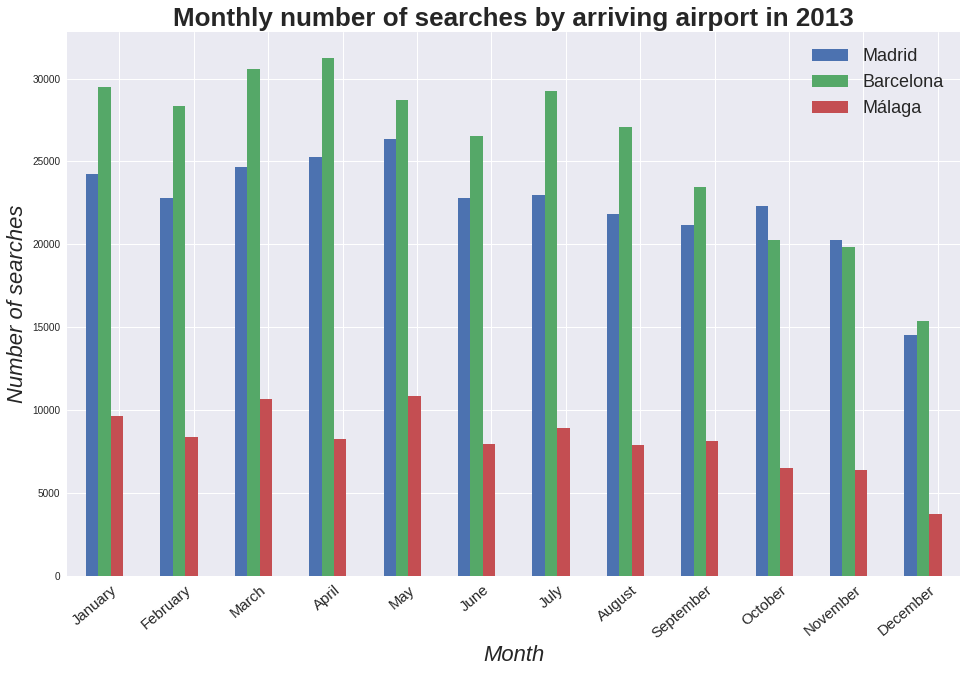

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

plt.tight_layout()
monthly_searches.plot(kind='bar', figsize=[16, 10])
plt.legend(loc='best', prop={'size':18})
plt.xlabel("Month", fontsize=22, fontstyle='oblique')
plt.ylabel("Number of searches", fontsize=22, fontstyle='oblique')
plt.xticks(np.arange(12)+0.2, monthly_searches.index, rotation=40, fontsize=15, ha='right')
plt.title('Monthly number of searches by arriving airport in 2013', fontsize=26, fontweight='bold')

plt.show()

## 4. Bonus exercise: match searches with bookings


We import the columns from each dataset that will be useful, and we rename `bookings` to match the names in `searches`.

In [0]:
searches = pd.read_csv(searches_file, delimiter= '^', usecols=['Date','Origin','Destination'])
bookings = pd.read_csv(bookings_file,usecols=['cre_date           ', 'dep_port', 'arr_port', 'pax'], sep='^')
bookings = bookings.rename(index=str, columns={'cre_date           ': "Date", "dep_port": "Origin","arr_port": "Destination" })

As before, we will drop the empty values:

In [35]:
bookings.isnull().sum()

Date           0
Origin         0
Destination    0
pax            1
dtype: int64

In [36]:
searches.isnull().sum()

Date            0
Origin         33
Destination    33
dtype: int64

In [0]:
bookings = bookings.dropna()
searches = searches.dropna()

Since we are trating with dates, we will use the same format for both of them. Thus, we drop the useless info (the hour, which never changes) here:

In [0]:
bookings.loc[:,'Date'] = bookings.loc[:,'Date'].str.replace(' 00:00:00','')

In order to obtain the matching, we can create an identifier using the Date, the Origin and the Destination. They should match in both sides. 

In [0]:
bookings['ID'] = bookings['Date']+bookings['Origin'].str.strip()+bookings['Destination'].str.strip()

In [0]:
searches['ID'] = searches['Date']+searches['Origin'].str.strip()+searches['Destination'].str.strip()

In [75]:
bookings['ID'][4]

'2013-03-26AKLSVO'

In [0]:
searches.sort_values('ID',ascending=False, inplace=True)

In [0]:
bookings.sort_values('ID',ascending=False, inplace=True)